<a href="https://colab.research.google.com/github/Ishika-ag/MINI-PROJECT/blob/main/minor_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

!pip install bing-image-downloader

In [ ]:
!mkdir images

mkdir: cannot create directory ‘images’: File exists


In [ ]:
from bing_image_downloader import downloader
downloader.download("hills", limit= 30 , output_dir='images',adult_filter_off= True)

[%] Downloading Images to /content/images/hills


[!!]Indexing page: 1

[%] Indexed 30 Images on Page 1.


[%] Downloading Image #1 from https://sp-images.summitpost.org/841555.jpg?auto=format&amp;fit=max&amp;h=1000&amp;ixlib=php-2.1.1&amp;q=35&amp;s=c8c38301280b5fd59ec7b0c1bfdedca4
[!] Issue getting: https://sp-images.summitpost.org/841555.jpg?auto=format&amp;fit=max&amp;h=1000&amp;ixlib=php-2.1.1&amp;q=35&amp;s=c8c38301280b5fd59ec7b0c1bfdedca4
[!] Error:: HTTP Error 403: Forbidden
[%] Downloading Image #1 from https://images3.roofandfloor.com/listing_00202010000700090033000000000009/1024x600/arsis-green-hills-true-view-in-322-1602043616130.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://s22658.pcdn.co/wp-content/uploads/2020/03/Centennial_scaled.jpg
[%] File Downloaded !

[%] Downloading Image #3 from http://3.bp.blogspot.com/_j03anToF4sQ/SwSgUZTrJBI/AAAAAAAAF4k/q8ht2FL-BoE/w1200-h630-p-k-no-nu/wayah365.JPG
[%] File Downloaded !

[%] Downloading Image #4 from http://

In [ ]:
downloader.download("beach", limit= 30 , output_dir='images',adult_filter_off= True)

[%] Downloading Images to /content/images/beach


[!!]Indexing page: 1

[%] Indexed 30 Images on Page 1.


[%] Downloading Image #1 from https://i.pinimg.com/originals/af/4b/56/af4b5638a351577ffa176313b02fadd7.jpg
[%] File Downloaded !

[%] Downloading Image #2 from http://wordpress.point2.com/624400/wp-content/uploads/sites/4531/2020/06/mayto.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://mediaserver.realestate.co.nz/listings/3003840/9564eb94553e4d0a76247a1f080c4cb5.crop.990x661.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://www.totalokinawa.com/wp-content/uploads/2020/07/DSCF3012-scaled.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://assets.thesparksite.com/uploads/sites/834/2019/09/solana-beach.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://media-cdn.tripadvisor.com/media/vr-splice-j/06/6c/a7/c7.jpg
[%] File Downloaded !

[%] Downloading Image #7 from https://sncdn.com/db/id/1696027/g439460.jpg
[%] File Downloade

In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

target=[]
images=[]
flat_data=[]

DATADIR= '/content/images'
CATEGORIES= ['hills', 'beach']

for category in CATEGORIES:
  class_num = CATEGORIES.index(category)
  path=os.path.join(DATADIR , category)
  

  for img in os.listdir(path):
    img_array=imread(os.path.join(path,img))
    img_resized =resize(img_array,(150,150,3))
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_num)

flat_data= np.array(flat_data)
target= np.array(target)
images= np.array(images)


<BarContainer object of 2 artists>

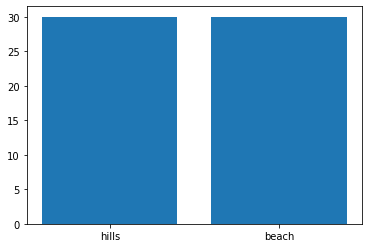

In [ ]:
unique, count = np.unique(target, return_counts=True)
plt.bar(CATEGORIES,count)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test , y_train, y_test = train_test_split (flat_data, target,random_state= 79)


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid= [
             {'C':[1,10,100,1000],'kernel':['linear']},
             {'C':[1,10,100,1000],'gamma':[0.001 , 0.0001],'kernel':['rbf']},
]
svc= svm.SVC(probability= True)
clf =GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
y_pred = clf.predict(x_test)
y_pred

array([0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0])

In [ ]:
y_test

array([0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score ,confusion_matrix

In [ ]:
accuracy_score(y_pred,y_test)

0.8

In [ ]:
confusion_matrix(y_pred,y_test)

array([[4, 1],
       [2, 8]])

In [ ]:
import pickle
pickle.dump(clf,open('img_model.p','wb'))

In [ ]:
model=pickle.load(open('img_model.p','rb'))

Enter your URLhttps://image.shutterstock.com/image-photo/chairs-umbrella-palm-beach-tropical-260nw-559599520.jpg
(280, 590, 3)
 PREDICTED OUTPUT: beach


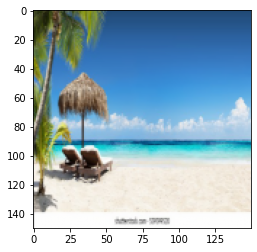

In [ ]:
flat_data=[]
url= input('Enter your URL')
img= imread(url)
img_resized=resize(img ,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out= model.predict(flat_data)
y_out= CATEGORIES[y_out[0]]
print(f' PREDICTED OUTPUT: {y_out}')